In [3]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


利用Tensorflow的 Fashion MNIST 数据集中的70000张包含了10个分类的个人日常衣物的分类图，每张图的尺寸在28x28像素。

Fashion MNIST旨在替代经典MNIST数据集，通常被用作计算机视觉机器学习程序的“ Hello，World”。

MNIST数据集包含手写数字（0、1、2等）的图像，格式与您将在此处使用的衣服的格式相同。

这里60000张图片是用来训练神经网络的，10000张图片用来评估神经网络学习的准确度。

直接从TensorFlow导入和加载Fashion MNIST数据

In [5]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
train_images.shape

(60000, 28, 28)

In [13]:
train_labels.shape

(60000,)

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
test_images.shape

(10000, 28, 28)

In [17]:
test_labels.shape

(10000,)

## 数据预处理

在tensorflow 1中已经学习到数据在进入神经网络之前需要预处理，查看训练数据集中的第一张图（最好不要查看测试数据集），第一张图中包含784个像素点，每个像素点的值从0-255之间。

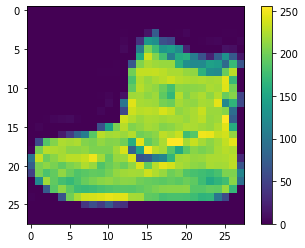

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

处理图像中的像素点的值，将像素点的值归一化到0-1之间，0表示黑色，1表示白色。以相同的方式训练和检验数据集是很重要的。

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

验证数据已经准备好了训练了，我们将训练数据集中的前25张图片，并标记相对应的物体名称。

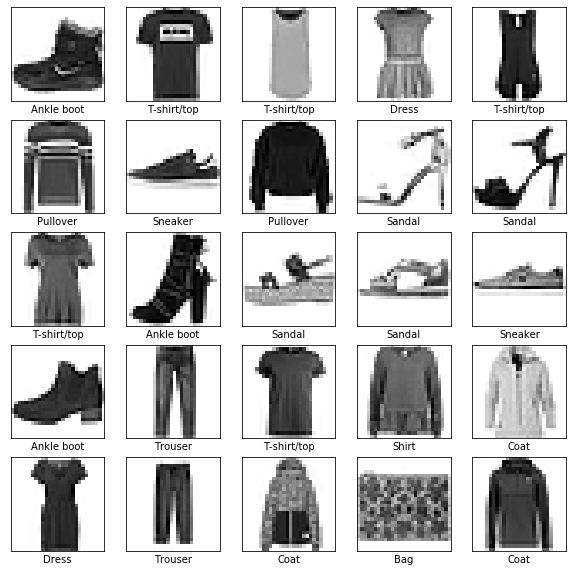

In [11]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 构建模型

设置网络层。神经网络的基本构建模块是层。从训练数据中读取相应的数据，能表示图像的内容。深度学习的大部分内容是将简单的层链接在一起（这跟之前的神经网络八股相同）。构建模型，即就是搭建前向传播通路。

大多数图层（例如tf.keras.layers.Dense）具有在训练期间学习的参数。

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

该网络的第一层是tf.keras.layers.Flatten，将图像的格式从二维数组（28 x 28像素）转换为一维数组（28 * 28 = 784像素）。这里跟图像数字识别中的展开为一维数组，并输入到神经网络。该层没有学习参数。它只会重新格式化数据。

像素展平后，网络由两个tf.keras.layers.Dense层序列组成。这些是紧密连接或完全连接的神经层。第一密集层具有128个神经元。第二层（也是最后一层）返回长度为10的logits数组。这一层是输出层，即输出数据。每个节点包含一个分数，该分数指示当前图像属于10个类别之一。也就是在如果属于某一类的话，那么这个长度为10的数组中对应的index位置的元素为1，其余的为0。

## 编译模型

在训练模型之前，需要进行一些设置。这些是在模型的编译步骤中添加的：
- 设置损失函数（loss）：这可以衡量训练期间模型的准确性。您希望最小化此功能，以在正确的方向上“引导”模型。
- 优化器（Optimizer）：这就是基于模型看到的数据及其损失函数来更新模型的方式。
- 指标（Metrics）：用于监视培训和测试步骤。以下示例使用准确性（正确分类的图像分数）。

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 训练模型

训练神经网络模型，需要进行如下步骤：
- 将训练数据喂入模型。在此示例中，训练数据在train_images和train_labels数组中。
- 这些数据包括该模型学习关联图像和标签（正确答案）。
- 您要求模型对测试集进行预测（在本示例中为test_images数组）。
- 检验预测的与test_labels数组中的标签匹配。

喂入模型

要开始训练，请调用model.fit方法，之所以这么称呼是因为它使模型“适合”训练数据：

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5059 - accuracy: 0.8234
Epoch 2/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3776 - accuracy: 0.8644
Epoch 3/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3381 - accuracy: 0.8772
Epoch 4/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3158 - accuracy: 0.8859
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2971 - accuracy: 0.8894
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2822 - accuracy: 0.8962
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2694 - accuracy: 0.9020
Epoch 8/10
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2573 - accuracy: 0.9047
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2486 - accuracy: 0.9076
Epoch 10/10
60

模型训练时，会显示损失和准确性指标。

该模型在训练数据上达到约0.91（或91％）的精度。

## 评估模型准确度

接下来比较模型在测试集上的准确度。

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n测试准度:', test_acc)

10000/10000 - 0s - loss: 0.3688 - accuracy: 0.8748

测试准度: 0.8748


事实证明，测试数据集的准确性略低于训练数据集的准确性。训练准确性和测试准确性之间的差距代表过度拟合。

当机器学习模型在新的，以前看不见的输入上的表现比训练数据上的表现差时，就会发生过度拟合。

过度拟合的模型“存储”训练数据集中的噪声和细节，从而对新数据的模型性能产生负面影响。

## 作出预测

模型的线性输出，对数。附加一个softmax层，以将logit转换为更容易解释的概率。

In [16]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

在这里，模型已经预测了测试集中每个图像的标签。让我们看一下第一个预测：

In [17]:
predictions[0]

array([9.7528051e-08, 6.0350116e-09, 2.8183546e-08, 1.3599116e-09,
       1.4124031e-08, 2.1064687e-03, 2.7093014e-07, 9.3065929e-03,
       1.4507440e-06, 9.8858505e-01], dtype=float32)

上面的结果，是表示图1在各个类别上的概率，数值越大表示可能是该类的概率越大，我们选择最大的那个值，则这个值的下标就是该图的类别。

In [18]:
np.argmax(predictions[0])

9

也就是说图1的类别是9。因此，该模型最有信心该图像是脚踝靴或class_names [9]。检查测试标签表明此分类是正确的：

In [19]:
test_labels[0]

9

这么看来我们的预测是正确的。我们使用图像来展示预测的概率分布情况。

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## 验证预测

通过训练模型，您可以使用它来预测某些图像。

让我们看一下第0张图像，预测和预测数组。正确的预测标签为蓝色，错误的预测标签为红色。该数字给出了预测标签的百分比（满分为100）。

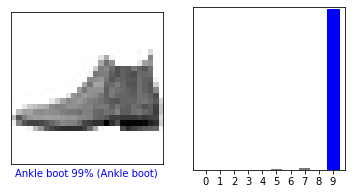

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

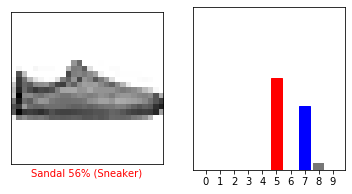

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

让我们绘制一些带有预测的图像。请注意，即使非常自信，该模型也可能是错误的。

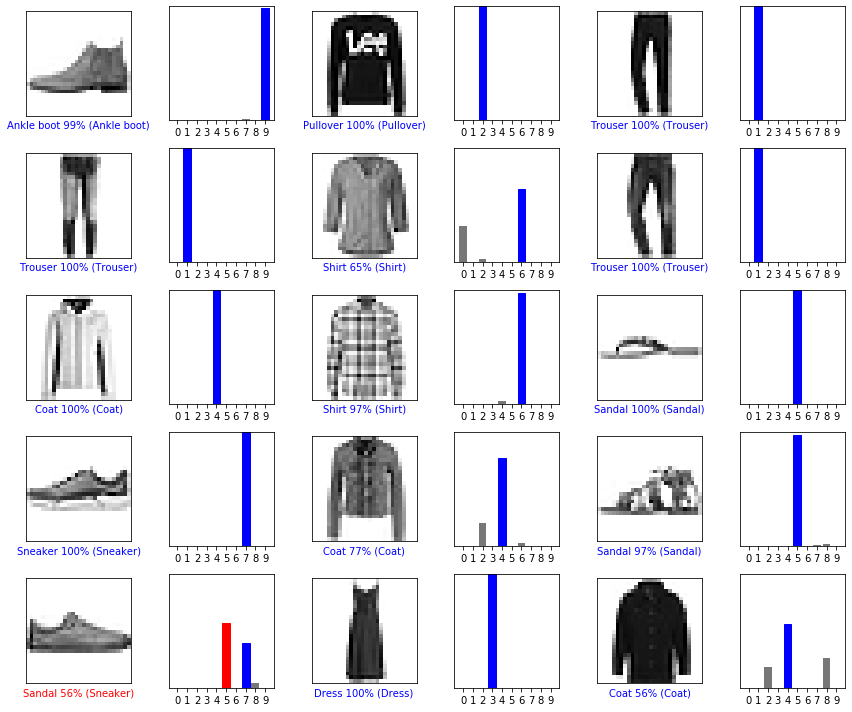

In [23]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 使用模型

最后，使用经过训练的模型对单个图像进行预测。

In [44]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


tf.keras模型经过优化，可以一次对一批或一组示例进行预测。因此，即使您使用的是单个图像，也需要将其添加到列表中：

In [45]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


[[1.4036710e-06 6.4735947e-12 9.9976820e-01 3.7158758e-13 1.9753959e-04
  3.2216701e-15 3.2925807e-05 5.4119556e-16 5.5922927e-10 3.1050958e-18]]


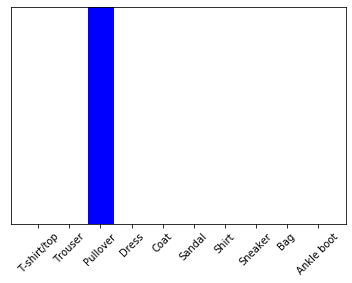

In [46]:
predictions_single = probability_model.predict(img)

print(predictions_single)

plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
np.argmax(predictions_single[0])

2